### Telegram-бот для расчёта нормы воды, калорий и трекинга активности

**Описание задания:**  
Ваша задача — создать Telegram-бота, который помогает пользователю рассчитать дневные нормы воды и калорий, а также отслеживать тренировки и питание.

### Цели задания:

1. **Рассчитать индивидуальные дневные нормы воды и калорий:**
   - Учитывайте параметры пользователя, уровень активности, текущую погоду и потребляемую еду.
   - Используйте реальные данные продуктов через API или иным способом.

2. **Добавить функции трекинга:**
   - Логировать тренировки и пересчитывать расход калорий.
   - Логировать питание и добавлять потреблённые калории в расчёты.

3. **Создать интерактивный Telegram-бот:**
   - Настройка профиля (вес, активность, город).
   - Отчёт о текущем прогрессе по воде и калориям.

### Описание функционала

#### 1. **Настройка профиля пользователя:**
   - Команда `/set_profile` запрашивает:
     - Вес (в кг), рост (в см) и возраст.
     - Уровень активности (минуты в день).
     - Город (для получения температуры).
     - Цель калорий (по умолчанию рассчитывается, но можно задавать вручную).
     - Любые параметры по вашему усмотрению.

   - Пример:
     ```
     Бот: Введите ваш вес (в кг):
     Пользователь: 80
     Бот: Введите ваш рост (в см):
     Пользователь: 184
     Бот: Введите ваш возраст:
     Пользователь: 26
     Бот: Сколько минут активности у вас в день?
     Пользователь: 45
     Бот: В каком городе вы находитесь?
     Пользователь: Moscow
     ```

#### 2. **Примеры расчёта дневных норм:**
   - **Норма воды:**
     
$\text{Базовая норма} = \text{Вес} \times 30 \, \text{мл/кг}$  
$+ 500 \, \text{мл}$ за каждые 30 минут активности.  
$+ 500-1000 \, \text{мл}$ за жаркую погоду (> 25°C).

   - **Норма калорий:**
     
$\text{Калории} = 10 \times \text{Вес (кг)} + 6.25 \times \text{Рост (см)} - 5 \times \text{Возраст}$
     
$\text{+ Уровень активности добавляет калории (200-400 в зависимости от времени и типа тренировки). Можете указать формулу на свой выбор}$

   - Можете использовать другие формулы по желанию. Можете использовать в расчётах другие параметры, запрашиваемые у пользователя, например, пол.

#### 3. **Логирование воды:**
   - Команда `/log_water <количество>`:
     - Сохраняет, сколько воды выпито.
     - Показывает, сколько осталось до выполнения нормы.

#### 4. **Логирование еды:**
   - Команда `/log_food <название продукта>`:
     - Бот использует API (например, OpenFoodFacts) для получения информации о продукте или иной подход.
     - Сохраняет калорийность.

   - Пример:
     ```
     Пользователь: /log_food банан
     Бот: 🍌 Банан — 89 ккал на 100 г. Сколько грамм вы съели?
     Пользователь: 150
     Бот: Записано: 133.5 ккал.
     ```

#### 5. **Логирование тренировок:**
   - Команда `/log_workout <тип тренировки> <время (мин)>`:
     - Фиксирует сожжённые калории.
     - Учитывает расход воды на тренировке (дополнительные 200 мл за каждые 30 минут) или более умный учет разных типов тренировок.

   - Пример:
     ```
     Пользователь: /log_workout бег 30
     Бот: 🏃‍♂️ Бег 30 минут — 300 ккал. Дополнительно: выпейте 200 мл воды.
     ```

#### 6. **Прогресс по воде и калориям:**
   - Команда `/check_progress`:
     - Показывает, сколько воды и калорий потреблено, сожжено и сколько осталось до выполнения цели.

   - Пример:
     ```
     📊 Прогресс:
     Вода:
     - Выпито: 1500 мл из 2400 мл.
     - Осталось: 900 мл.
     
     Калории:
     - Потреблено: 1800 ккал из 2500 ккал.
     - Сожжено: 400 ккал.
     - Баланс: 1400 ккал.
     ```

#### Пример хранения данных:

Данные пользователя сохраняются в памяти (без базы данных, мы пока это не проходили):
```python
users = {
    "user_id": {
        "weight": 80,
        "height": 184,
        "age": 26,
        "activity": 45,
        "city": "Paris",
        "water_goal": 2400,
        "calorie_goal": 2500,
        "logged_water": 500,
        "logged_calories": 1800,
        "burned_calories": 400
    }
}
```
Если вы знаете как работать с базами данных или имеете желание разобраться с этим до соответствующей лекции, то используйте базу данных, это более правильный подход.

#### Создание бота в Telegram

1. Перейдите к боту `@BotFather` в Telegram.
2. Используйте команду `/newbot` для создания нового бота.
3. Сохраните токен вашего бота.

### Критерии оценивания:

1. Реализован телеграм-бот с помощью выбранной библиотеки, который обрабатывает запросы пользователя и как минимум просто работает – 2 балла.
2. Реализована настройка профиля пользователя с сохранением информации в программе – 1 балл.
3. Реализован корректный расчёт воды и калорий – 0.3 балла. Если в задании есть неопределенность, решите ее по своему выбору.
4. Успешное использование OpenWeatherMap или иного API для погоды (это вы умеете из ДЗ 1) и OpenFoodFacts или иного способа расчета калорийности – 0.2 балла.
5. Бот позволяет фиксировать воду, еду и тренировки, и каждый из этих методов корректно обновляет все состояния и данные – по 1.5 балла за каждый, всего 4.5 балла.
6. Корректно реализован метод, возвращающий прогресс по воде и калориям – 1 балл.
7. Деплой бота на онлайн-сервер, например, на render.com, выполнен корректно. В качестве подтверждения того, что вы успешно задеплоили бота, необходимо прикрепить скриншот с логами, на котором будет видно, что build был успешен. В идеале, чтобы были показаны все команды, которые отправлял пользователь, которые вы будете логировать с помощью, например, middleware, как на лекции – 1 балл.

### Формат сдачи домашнего задания

Сдать в форму необходимо:
1. Ссылку на код.
2. Скриншоты с демонстрацией того как работает ваш телеграм-бот. Должна быть показана работа всех реализованных методов. Проще всего это сделать при локальном деплое.
3. Подтверждение того что вы смогли задеплоить бот на какой-нибудь онлайн ресурс.

Не забудьте удалить ключи API и иную чувствительную информацию.

#### Дополнительная функциональность:

1. **Графики:** Постройте графики прогресса по воде и калориям и реализуйте функциональность бота для пока этих графиков (макс + 2 балла).
2. **Рекомендации:** Бот может предлагать продукты с низким содержанием калорий или тренировки для достижения целей (макс + 1 балл, логику можете предложить любую).
3. **Продвинутое определение калорийности:** Можете реализовать какой-то более умный способ определения калорийности продукта (макс + 2 балла).

**Всего за задание может быть не более 14 баллов.**


#### Для деплоя можете использовать простой Dockerfile
```Dockerfile
FROM python:3.10

WORKDIR /app

COPY requirements.txt requirements.txt
RUN pip install -r requirements.txt

COPY . .

CMD ["python", "bot.py"]
```

Внизу приведены некоторые примеры-подсказки:

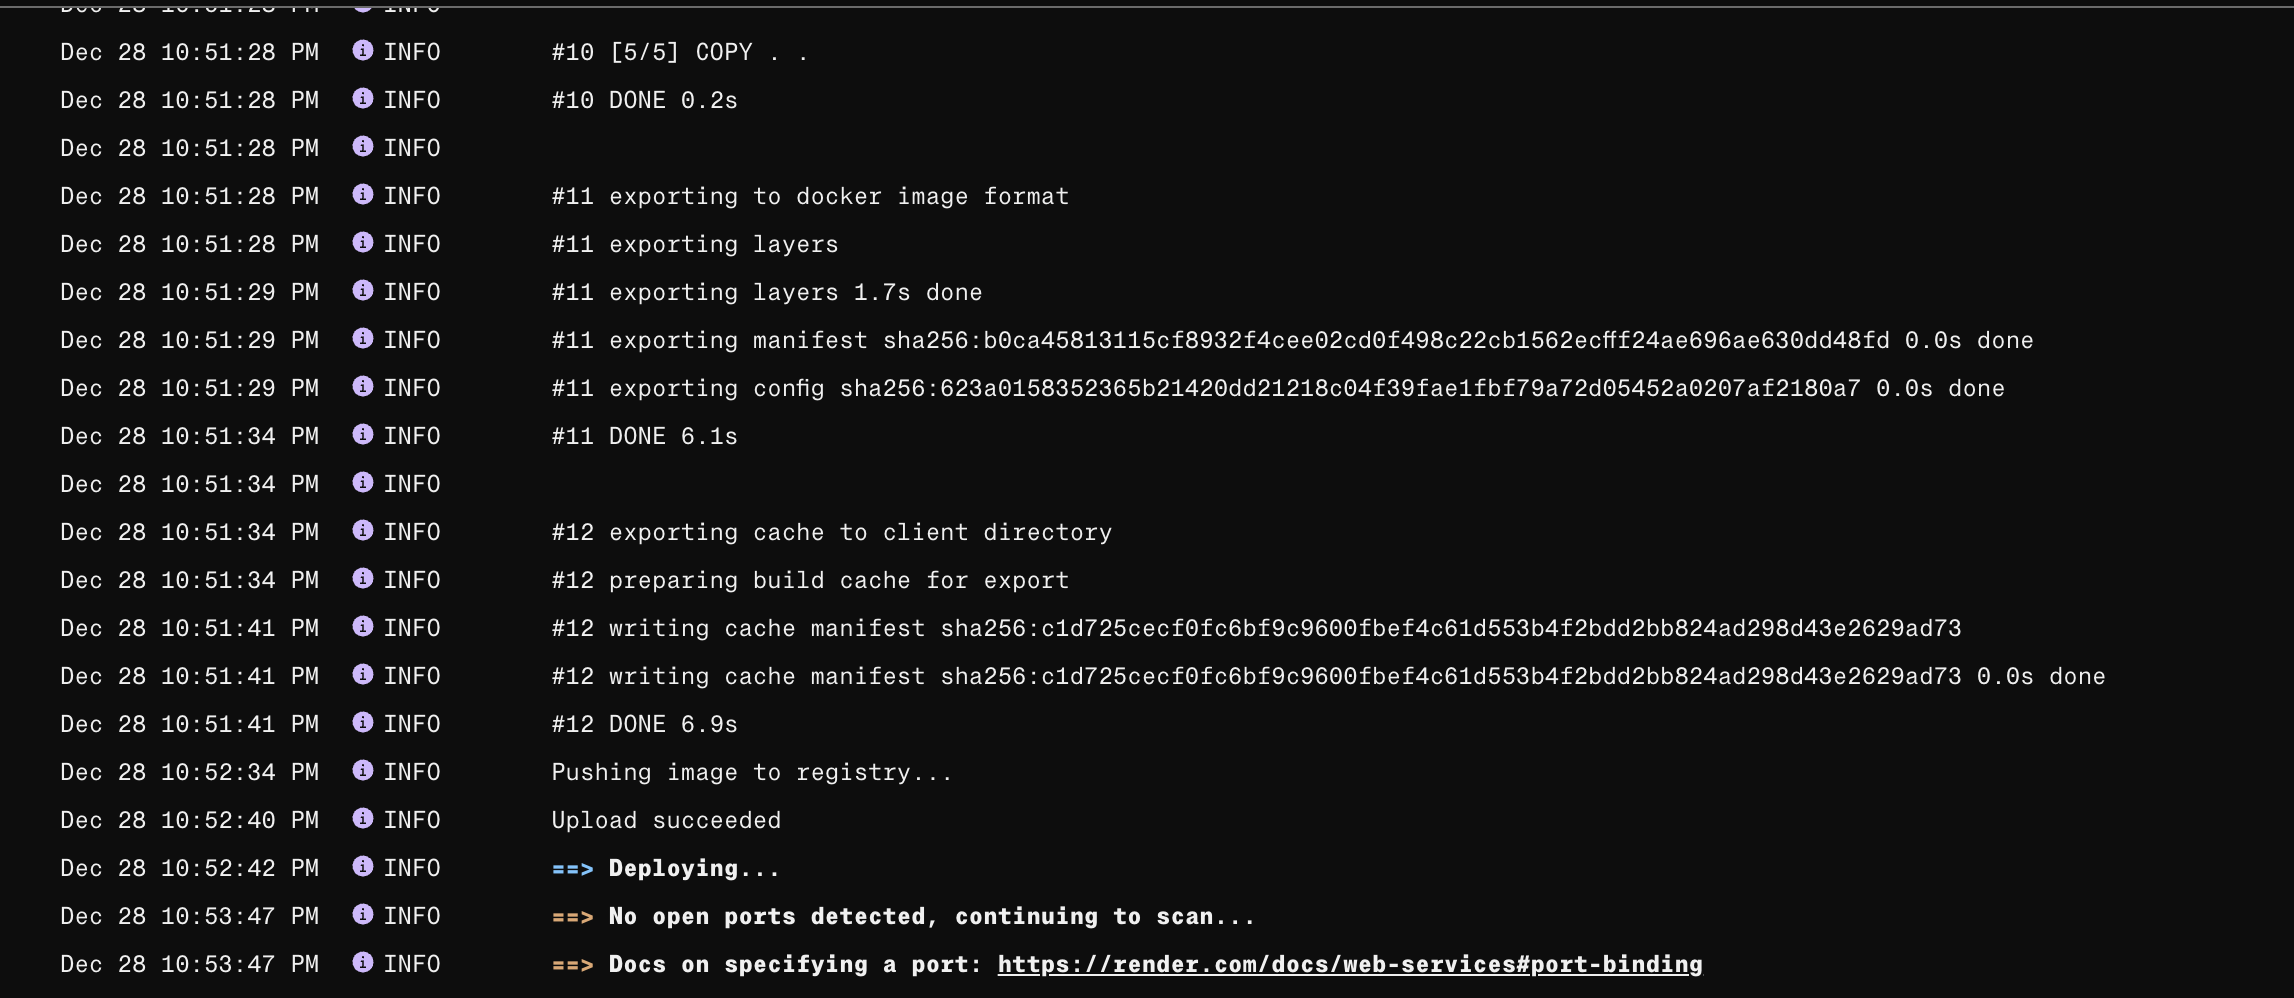

In [ ]:
# Пример подтверждения успешного деплоя
from IPython.display import Image, display
display(Image(filename='/content/image.png'))

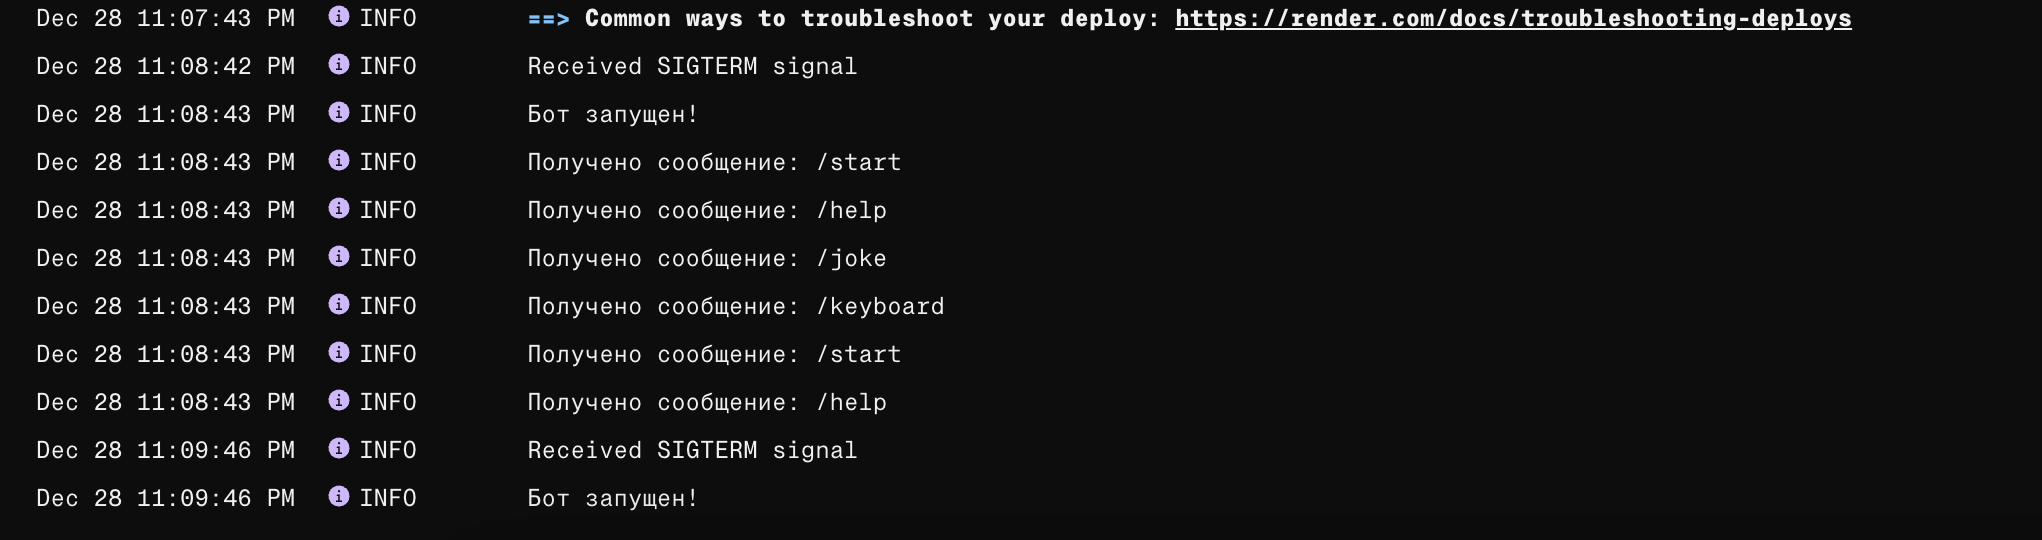

In [ ]:
# Пример логов после деплоя
display(Image(filename='/content/logs.png'))

In [ ]:
# Пример поиска калорийности продукта. Работает так себе и ищет не то что нужно, но для нашего задания пойдет
import requests

def get_food_info(product_name):
    url = f"https://world.openfoodfacts.org/cgi/search.pl?action=process&search_terms={product_name}&json=true"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        products = data.get('products', [])
        if products:  # Проверяем, есть ли найденные продукты
            first_product = products[0]
            return {
                'name': first_product.get('product_name', 'Неизвестно'),
                'calories': first_product.get('nutriments', {}).get('energy-kcal_100g', 0)
            }
        return None
    print(f"Ошибка: {response.status_code}")
    return None


In [ ]:
get_food_info("banana")

{'name': 'Gerble - Organic Chocolate Cookie Flavored w/ Banana, 132g (4.7oz)',
 'calories': 459}

In [ ]:
get_food_info("банан")

{'name': 'Danonino ягода- банан', 'calories': 90}

In [ ]:
get_food_info("молочная каша")

{'name': 'Каша молочная гречневая детская каша', 'calories': 0}

In [ ]:
# Хоть с чем-то работает правильно!!!
get_food_info("apfelstrudel")

{'name': 'Apfelstrudel', 'calories': 227}

In [ ]:
# Но не на русском :(
get_food_info("штрудель")

{'name': 'Австрийский штрудель вишня и ваниль', 'calories': 0}

In [ ]:
# Или работает, но возвращает калорийность, вероятно, для 100 мл.
get_food_info("капучино")

{'name': 'Капучино', 'calories': 56}

In [ ]:
# Ну мы уже поняли, что API недостаточно хорош
print(get_food_info("лавандовый раф"))

None


Успехов!

## Реализация бота

In [5]:
# Установка зависимостей
!pip install aiogram requests

In [ ]:
import asyncio
import logging
import os
import io
import random
import requests
from datetime import datetime
from aiogram import Bot, Dispatcher, Router, F
from aiogram.filters import Command
from aiogram.types import Message, BufferedInputFile
from aiogram.fsm.context import FSMContext
from aiogram.fsm.state import State, StatesGroup
from aiogram.fsm.storage.memory import MemoryStorage
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')  # Для работы без GUI

# Настройка логирования
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Токены (замените на свои)
BOT_TOKEN = "8488695563:AAHnrdRVZRz_u4RImqUEMHHYzPJfbkeJcLM"
WEATHER_API_KEY = "72fffdff8d1b45be627ca360f221d916"

# Хранилище данных пользователей
users = {}

router = Router()


# Состояния для настройки профиля
class ProfileSetup(StatesGroup):
    weight = State()
    height = State()
    age = State()
    activity = State()
    city = State()


# Состояния для логирования еды
class FoodLogging(StatesGroup):
    waiting_for_grams = State()


# Калории за минуту для разных типов тренировок
WORKOUT_CALORIES = {
    "бег": 10,
    "ходьба": 5,
    "плавание": 8,
    "велосипед": 7,
    "силовая": 6,
    "йога": 3,
    "кардио": 8,
}

# Локальная база данных популярных продуктов (калории на 100г)
LOCAL_FOOD_DATABASE = {
    # Фрукты
    "банан": {"name": "Банан", "calories": 89},
    "яблоко": {"name": "Яблоко", "calories": 52},
    "апельсин": {"name": "Апельсин", "calories": 47},
    "груша": {"name": "Груша", "calories": 57},
    "виноград": {"name": "Виноград", "calories": 67},
    "клубника": {"name": "Клубника", "calories": 33},
    "арбуз": {"name": "Арбуз", "calories": 30},
    "дыня": {"name": "Дыня", "calories": 34},
    "персик": {"name": "Персик", "calories": 39},
    "манго": {"name": "Манго", "calories": 60},
    "киви": {"name": "Киви", "calories": 61},
    "ананас": {"name": "Ананас", "calories": 50},
    "авокадо": {"name": "Авокадо", "calories": 160},
    
    # Овощи
    "огурец": {"name": "Огурец", "calories": 15},
    "помидор": {"name": "Помидор", "calories": 18},
    "морковь": {"name": "Морковь", "calories": 41},
    "капуста": {"name": "Капуста белокочанная", "calories": 25},
    "брокколи": {"name": "Брокколи", "calories": 34},
    "картофель": {"name": "Картофель", "calories": 77},
    "лук": {"name": "Лук репчатый", "calories": 40},
    "перец": {"name": "Перец болгарский", "calories": 27},
    "баклажан": {"name": "Баклажан", "calories": 25},
    "кабачок": {"name": "Кабачок", "calories": 17},
    "свекла": {"name": "Свёкла", "calories": 43},
    "шпинат": {"name": "Шпинат", "calories": 23},
    "салат": {"name": "Салат листовой", "calories": 14},
    
    # Молочные продукты
    "молоко": {"name": "Молоко 2.5%", "calories": 52},
    "кефир": {"name": "Кефир 2.5%", "calories": 50},
    "творог": {"name": "Творог 5%", "calories": 121},
    "сыр": {"name": "Сыр твёрдый", "calories": 350},
    "йогурт": {"name": "Йогурт натуральный", "calories": 60},
    "сметана": {"name": "Сметана 15%", "calories": 158},
    "масло": {"name": "Масло сливочное", "calories": 748},
    
    # Мясо и рыба
    "курица": {"name": "Куриная грудка", "calories": 113},
    "говядина": {"name": "Говядина", "calories": 187},
    "свинина": {"name": "Свинина", "calories": 259},
    "индейка": {"name": "Индейка", "calories": 104},
    "рыба": {"name": "Рыба (средняя)", "calories": 120},
    "лосось": {"name": "Лосось", "calories": 208},
    "тунец": {"name": "Тунец", "calories": 130},
    "креветки": {"name": "Креветки", "calories": 95},
    
    # Крупы и злаки
    "рис": {"name": "Рис варёный", "calories": 130},
    "гречка": {"name": "Гречка варёная", "calories": 110},
    "овсянка": {"name": "Овсянка варёная", "calories": 88},
    "макароны": {"name": "Макароны варёные", "calories": 131},
    "хлеб": {"name": "Хлеб белый", "calories": 265},
    "хлеб черный": {"name": "Хлеб чёрный", "calories": 201},
    
    # Яйца
    "яйцо": {"name": "Яйцо куриное", "calories": 155},
    "яичница": {"name": "Яичница", "calories": 196},
    "омлет": {"name": "Омлет", "calories": 154},
    
    # Напитки
    "кофе": {"name": "Кофе без сахара", "calories": 2},
    "чай": {"name": "Чай без сахара", "calories": 0},
    "сок": {"name": "Сок апельсиновый", "calories": 45},
    "кола": {"name": "Кола", "calories": 42},
    "капучино": {"name": "Капучино", "calories": 45},
    "латте": {"name": "Латте", "calories": 56},
    "раф": {"name": "Раф кофе", "calories": 85},
    "лавандовый раф": {"name": "Лавандовый раф", "calories": 95},
    
    # Сладости и выпечка
    "шоколад": {"name": "Шоколад молочный", "calories": 535},
    "печенье": {"name": "Печенье", "calories": 417},
    "торт": {"name": "Торт (средний)", "calories": 350},
    "мороженое": {"name": "Мороженое", "calories": 207},
    "конфеты": {"name": "Конфеты шоколадные", "calories": 490},
    "пирожное": {"name": "Пирожное", "calories": 320},
    "штрудель": {"name": "Штрудель яблочный", "calories": 227},
    
    # Фастфуд
    "пицца": {"name": "Пицца", "calories": 266},
    "бургер": {"name": "Бургер", "calories": 295},
    "картошка фри": {"name": "Картофель фри", "calories": 312},
    "наггетсы": {"name": "Куриные наггетсы", "calories": 296},
    "шаурма": {"name": "Шаурма", "calories": 210},
    "хот-дог": {"name": "Хот-дог", "calories": 290},
    
    # Орехи и семена
    "орехи": {"name": "Орехи (смесь)", "calories": 607},
    "арахис": {"name": "Арахис", "calories": 567},
    "миндаль": {"name": "Миндаль", "calories": 576},
    "грецкий орех": {"name": "Грецкий орех", "calories": 654},
    "семечки": {"name": "Семечки подсолнуха", "calories": 578},
    
    # Каши и завтраки
    "каша": {"name": "Каша на молоке", "calories": 102},
    "молочная каша": {"name": "Каша молочная", "calories": 102},
    "мюсли": {"name": "Мюсли", "calories": 352},
    "хлопья": {"name": "Кукурузные хлопья", "calories": 357},
    
    # Супы
    "борщ": {"name": "Борщ", "calories": 49},
    "щи": {"name": "Щи", "calories": 31},
    "суп": {"name": "Суп куриный", "calories": 36},
    "солянка": {"name": "Солянка", "calories": 69},
}

# База низкокалорийных продуктов для рекомендаций
LOW_CALORIE_FOODS = [
    {"name": "Огурец", "calories": 15, "benefit": "Отлично утоляет жажду"},
    {"name": "Салат листовой", "calories": 14, "benefit": "Богат клетчаткой"},
    {"name": "Кабачок", "calories": 17, "benefit": "Лёгкий гарнир"},
    {"name": "Помидор", "calories": 18, "benefit": "Источник ликопина"},
    {"name": "Шпинат", "calories": 23, "benefit": "Богат железом"},
    {"name": "Брокколи", "calories": 34, "benefit": "Много витаминов"},
    {"name": "Клубника", "calories": 33, "benefit": "Вкусный десерт"},
    {"name": "Арбуз", "calories": 30, "benefit": "Утоляет жажду"},
    {"name": "Куриная грудка", "calories": 113, "benefit": "Белок без жира"},
    {"name": "Творог 5%", "calories": 121, "benefit": "Белок + кальций"},
]

# Рекомендации по тренировкам
WORKOUT_RECOMMENDATIONS = [
    {"type": "ходьба", "duration": 30, "calories": 150, "description": "Лёгкая активность для начинающих"},
    {"type": "бег", "duration": 20, "calories": 200, "description": "Эффективное кардио"},
    {"type": "плавание", "duration": 30, "calories": 240, "description": "Нагрузка на все группы мышц"},
    {"type": "велосипед", "duration": 30, "calories": 210, "description": "Тренировка ног и кардио"},
    {"type": "йога", "duration": 45, "calories": 135, "description": "Гибкость и расслабление"},
    {"type": "силовая", "duration": 40, "calories": 240, "description": "Наращивание мышц"},
]

In [ ]:
# Вспомогательные функции
from typing import Optional, List, Tuple
from difflib import SequenceMatcher

def similarity(a: str, b: str) -> float:
    """Вычислить схожесть двух строк"""
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()


def find_in_local_db(product_name: str) -> Optional[dict]:
    """Поиск продукта в локальной базе данных с fuzzy matching"""
    product_lower = product_name.lower().strip()
    
    # Точное совпадение
    if product_lower in LOCAL_FOOD_DATABASE:
        return LOCAL_FOOD_DATABASE[product_lower]
    
    # Fuzzy matching - ищем похожие названия
    best_match = None
    best_score = 0
    
    for key, value in LOCAL_FOOD_DATABASE.items():
        # Проверяем совпадение с ключом
        score = similarity(product_lower, key)
        if score > best_score:
            best_score = score
            best_match = value
        
        # Проверяем, содержится ли ключ в запросе или наоборот
        if key in product_lower or product_lower in key:
            return value
    
    # Возвращаем только если схожесть > 60%
    if best_score > 0.6:
        return best_match
    
    return None


def get_food_info(product_name: str) -> Optional[dict]:
    """
    Получить информацию о продукте.
    Сначала ищем в локальной базе, потом в OpenFoodFacts API.
    """
    # Сначала пробуем локальную базу
    local_result = find_in_local_db(product_name)
    if local_result:
        return local_result
    
    # Если не нашли локально, пробуем API
    try:
        url = f"https://world.openfoodfacts.org/cgi/search.pl?action=process&search_terms={product_name}&json=true"
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            data = response.json()
            products = data.get("products", [])
            if products:
                first_product = products[0]
                calories = first_product.get("nutriments", {}).get("energy-kcal_100g", 0)
                if calories:  # Только если калории найдены
                    return {
                        "name": first_product.get("product_name", product_name),
                        "calories": calories,
                    }
    except Exception as e:
        logger.error(f"Ошибка получения информации о продукте: {e}")
    
    return None


def get_weather(city: str) -> Optional[float]:
    """Получить текущую температуру в городе через OpenWeatherMap API"""
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={WEATHER_API_KEY}&units=metric"
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            data = response.json()
            return data["main"]["temp"]
    except Exception as e:
        logger.error(f"Ошибка получения погоды: {e}")
    return None


def calculate_water_goal(weight: float, activity_minutes: int, temperature: Optional[float]) -> int:
    """
    Рассчитать дневную норму воды (мл)
    """
    base = weight * 30
    activity_bonus = (activity_minutes // 30) * 500

    weather_bonus = 0
    if temperature is not None:
        if temperature > 30:
            weather_bonus = 1000
        elif temperature > 25:
            weather_bonus = 500

    return int(base + activity_bonus + weather_bonus)


def calculate_calorie_goal(weight: float, height: float, age: int, activity_minutes: int) -> int:
    """
    Рассчитать дневную норму калорий
    """
    base = 10 * weight + 6.25 * height - 5 * age
    activity_bonus = activity_minutes * 5
    return int(base + activity_bonus)


def create_progress_chart(user_data: dict) -> bytes:
    """Создать график прогресса по воде и калориям"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Данные для графиков
    water_logged = user_data["logged_water"]
    water_goal = user_data["water_goal"]
    water_remaining = max(0, water_goal - water_logged)
    
    calories_logged = user_data["logged_calories"]
    calorie_goal = user_data["calorie_goal"]
    burned = user_data["burned_calories"]
    
    # Цвета
    colors_water = ['#3498db', '#ecf0f1']  # Синий и светло-серый
    colors_calories = ['#e74c3c', '#2ecc71', '#ecf0f1']  # Красный, зелёный, светло-серый
    
    # График воды (круговая диаграмма)
    water_values = [water_logged, water_remaining]
    water_labels = [f'Выпито\n{water_logged} мл', f'Осталось\n{water_remaining} мл']
    
    wedges1, texts1, autotexts1 = axes[0].pie(
        water_values, 
        labels=water_labels,
        colors=colors_water,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
        startangle=90,
        explode=(0.05, 0)
    )
    axes[0].set_title(f'💧 Вода\nЦель: {water_goal} мл', fontsize=14, fontweight='bold')
    
    # График калорий (столбчатая диаграмма)
    categories = ['Потреблено', 'Сожжено', 'Цель']
    values = [calories_logged, burned, calorie_goal]
    colors_bar = ['#e74c3c', '#2ecc71', '#3498db']
    
    bars = axes[1].bar(categories, values, color=colors_bar, edgecolor='white', linewidth=2)
    axes[1].set_ylabel('Калории (ккал)', fontsize=12)
    axes[1].set_title('🍽 Калории', fontsize=14, fontweight='bold')
    
    # Добавляем значения над столбцами
    for bar, val in zip(bars, values):
        height = bar.get_height()
        axes[1].annotate(f'{val:.0f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Добавляем линию баланса
    balance = calories_logged - burned
    axes[1].axhline(y=calorie_goal, color='#3498db', linestyle='--', linewidth=2, label=f'Цель: {calorie_goal}')
    axes[1].legend(loc='upper right')
    
    # Добавляем информацию о балансе
    balance_text = f'Баланс: {balance:.0f} ккал'
    if balance < calorie_goal:
        balance_color = '#2ecc71'  # Зелёный - в норме
    else:
        balance_color = '#e74c3c'  # Красный - превышение
    
    axes[1].text(0.5, -0.15, balance_text, transform=axes[1].transAxes, 
                 fontsize=12, fontweight='bold', color=balance_color,
                 ha='center')
    
    plt.tight_layout()
    
    # Сохраняем в байты
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    buf.seek(0)
    plt.close(fig)
    
    return buf.getvalue()


def create_history_chart(history: List[dict]) -> bytes:
    """Создать график истории за несколько дней"""
    if not history:
        return None
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    
    dates = [entry.get("date", f"День {i+1}") for i, entry in enumerate(history)]
    water_values = [entry.get("water", 0) for entry in history]
    calorie_values = [entry.get("calories", 0) for entry in history]
    water_goals = [entry.get("water_goal", 2000) for entry in history]
    calorie_goals = [entry.get("calorie_goal", 2000) for entry in history]
    
    # График воды
    axes[0].bar(dates, water_values, color='#3498db', alpha=0.8, label='Выпито')
    axes[0].plot(dates, water_goals, 'r--', linewidth=2, marker='o', label='Цель')
    axes[0].set_ylabel('Миллилитры')
    axes[0].set_title('💧 История потребления воды')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # График калорий
    axes[1].bar(dates, calorie_values, color='#e74c3c', alpha=0.8, label='Потреблено')
    axes[1].plot(dates, calorie_goals, 'g--', linewidth=2, marker='o', label='Цель')
    axes[1].set_ylabel('Калории')
    axes[1].set_title('🍽 История потребления калорий')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    buf.seek(0)
    plt.close(fig)
    
    return buf.getvalue()

In [ ]:
# Обработчики команд /start и /set_profile

@router.message(Command("start"))
async def cmd_start(message: Message):
    """Обработчик команды /start"""
    await message.answer(
        "Привет! Я бот для отслеживания питания, воды и активности.\n\n"
        "Доступные команды:\n"
        "/set_profile - Настроить профиль\n"
        "/log_water <мл> - Записать выпитую воду\n"
        "/log_food <продукт> - Записать еду\n"
        "/log_workout <тип> <минуты> - Записать тренировку\n"
        "/check_progress - Показать прогресс\n"
        "/show_graph - Показать графики прогресса\n"
        "/recommendations - Получить рекомендации"
    )


@router.message(Command("set_profile"))
async def cmd_set_profile(message: Message, state: FSMContext):
    """Начать настройку профиля"""
    await state.set_state(ProfileSetup.weight)
    await message.answer("Введите ваш вес (в кг):")


@router.message(ProfileSetup.weight)
async def process_weight(message: Message, state: FSMContext):
    """Обработка ввода веса"""
    try:
        weight = float(message.text.replace(",", "."))
        if weight <= 0 or weight > 500:
            raise ValueError("Некорректный вес")
        await state.update_data(weight=weight)
        await state.set_state(ProfileSetup.height)
        await message.answer("Введите ваш рост (в см):")
    except ValueError:
        await message.answer("Пожалуйста, введите корректный вес (число в кг):")


@router.message(ProfileSetup.height)
async def process_height(message: Message, state: FSMContext):
    """Обработка ввода роста"""
    try:
        height = float(message.text.replace(",", "."))
        if height <= 0 or height > 300:
            raise ValueError("Некорректный рост")
        await state.update_data(height=height)
        await state.set_state(ProfileSetup.age)
        await message.answer("Введите ваш возраст:")
    except ValueError:
        await message.answer("Пожалуйста, введите корректный рост (число в см):")


@router.message(ProfileSetup.age)
async def process_age(message: Message, state: FSMContext):
    """Обработка ввода возраста"""
    try:
        age = int(message.text)
        if age <= 0 or age > 150:
            raise ValueError("Некорректный возраст")
        await state.update_data(age=age)
        await state.set_state(ProfileSetup.activity)
        await message.answer("Сколько минут активности у вас в день?")
    except ValueError:
        await message.answer("Пожалуйста, введите корректный возраст (целое число):")


@router.message(ProfileSetup.activity)
async def process_activity(message: Message, state: FSMContext):
    """Обработка ввода активности"""
    try:
        activity = int(message.text)
        if activity < 0 or activity > 1440:
            raise ValueError("Некорректное время активности")
        await state.update_data(activity=activity)
        await state.set_state(ProfileSetup.city)
        await message.answer("В каком городе вы находитесь?")
    except ValueError:
        await message.answer("Пожалуйста, введите корректное количество минут:")


@router.message(ProfileSetup.city)
async def process_city(message: Message, state: FSMContext):
    """Обработка ввода города и завершение настройки профиля"""
    city = message.text.strip()
    data = await state.get_data()

    # Получаем температуру в городе
    temperature = get_weather(city)

    # Рассчитываем нормы
    water_goal = calculate_water_goal(data["weight"], data["activity"], temperature)
    calorie_goal = calculate_calorie_goal(data["weight"], data["height"], data["age"], data["activity"])

    # Сохраняем профиль пользователя
    user_id = message.from_user.id
    users[user_id] = {
        "weight": data["weight"],
        "height": data["height"],
        "age": data["age"],
        "activity": data["activity"],
        "city": city,
        "water_goal": water_goal,
        "calorie_goal": calorie_goal,
        "logged_water": 0,
        "logged_calories": 0,
        "burned_calories": 0,
        "history": [],  # История для графиков
    }

    await state.clear()

    weather_info = f"Температура в {city}: {temperature:.1f}°C" if temperature else f"Не удалось получить погоду для {city}"

    await message.answer(
        f"Профиль сохранён!\n\n"
        f"Вес: {data['weight']} кг\n"
        f"Рост: {data['height']} см\n"
        f"Возраст: {data['age']} лет\n"
        f"Активность: {data['activity']} мин/день\n"
        f"Город: {city}\n\n"
        f"{weather_info}\n\n"
        f"Ваши дневные нормы:\n"
        f"Вода: {water_goal} мл\n"
        f"Калории: {calorie_goal} ккал"
    )

In [9]:
# Обработчики команд /log_water и /log_food

@router.message(Command("log_water"))
async def cmd_log_water(message: Message):
    """Логирование выпитой воды"""
    user_id = message.from_user.id

    if user_id not in users:
        await message.answer("Сначала настройте профиль командой /set_profile")
        return

    args = message.text.split()
    if len(args) < 2:
        await message.answer("Использование: /log_water <количество мл>\nПример: /log_water 250")
        return

    try:
        amount = int(args[1])
        if amount <= 0:
            raise ValueError("Количество должно быть положительным")

        users[user_id]["logged_water"] += amount
        logged = users[user_id]["logged_water"]
        goal = users[user_id]["water_goal"]
        remaining = max(0, goal - logged)

        await message.answer(
            f"Записано: {amount} мл воды.\n\n"
            f"Выпито за день: {logged} мл из {goal} мл.\n"
            f"Осталось: {remaining} мл."
        )
    except ValueError:
        await message.answer("Пожалуйста, введите корректное количество воды в мл.")


@router.message(Command("log_food"))
async def cmd_log_food(message: Message, state: FSMContext):
    """Логирование еды"""
    user_id = message.from_user.id

    if user_id not in users:
        await message.answer("Сначала настройте профиль командой /set_profile")
        return

    args = message.text.split(maxsplit=1)
    if len(args) < 2:
        await message.answer("Использование: /log_food <название продукта>\nПример: /log_food банан")
        return

    product_name = args[1]
    food_info = get_food_info(product_name)

    if food_info is None or food_info["calories"] == 0:
        await message.answer(
            f"Не удалось найти информацию о продукте '{product_name}'.\n"
            "Попробуйте ввести название на английском или другой продукт."
        )
        return

    await state.update_data(
        food_name=food_info["name"],
        food_calories=food_info["calories"]
    )
    await state.set_state(FoodLogging.waiting_for_grams)

    await message.answer(
        f"{food_info['name']} — {food_info['calories']} ккал на 100 г.\n"
        "Сколько грамм вы съели?"
    )


@router.message(FoodLogging.waiting_for_grams)
async def process_food_grams(message: Message, state: FSMContext):
    """Обработка ввода граммов еды"""
    user_id = message.from_user.id

    try:
        grams = float(message.text.replace(",", "."))
        if grams <= 0:
            raise ValueError("Количество должно быть положительным")

        data = await state.get_data()
        calories = (data["food_calories"] / 100) * grams

        users[user_id]["logged_calories"] += calories

        await state.clear()

        await message.answer(
            f"Записано: {calories:.1f} ккал ({grams:.0f} г {data['food_name']})."
        )
    except ValueError:
        await message.answer("Пожалуйста, введите корректное количество в граммах:")

In [10]:
# Обработчики команд /log_workout и /check_progress

@router.message(Command("log_workout"))
async def cmd_log_workout(message: Message):
    """Логирование тренировки"""
    user_id = message.from_user.id

    if user_id not in users:
        await message.answer("Сначала настройте профиль командой /set_profile")
        return

    args = message.text.split()
    if len(args) < 3:
        workout_types = ", ".join(WORKOUT_CALORIES.keys())
        await message.answer(
            f"Использование: /log_workout <тип> <минуты>\n"
            f"Пример: /log_workout бег 30\n\n"
            f"Доступные типы тренировок: {workout_types}"
        )
        return

    workout_type = args[1].lower()
    try:
        minutes = int(args[2])
        if minutes <= 0:
            raise ValueError("Время должно быть положительным")
    except ValueError:
        await message.answer("Пожалуйста, введите корректное время тренировки в минутах.")
        return

    # Получаем калории за минуту (по умолчанию 5, если тип не найден)
    calories_per_min = WORKOUT_CALORIES.get(workout_type, 5)
    burned_calories = calories_per_min * minutes

    # Дополнительная вода: 200 мл за каждые 30 минут тренировки
    extra_water = (minutes // 30) * 200
    if minutes % 30 > 0:
        extra_water += 200

    users[user_id]["burned_calories"] += burned_calories
    users[user_id]["water_goal"] += extra_water

    workout_emoji = {
        "бег": "🏃",
        "ходьба": "🚶",
        "плавание": "🏊",
        "велосипед": "🚴",
        "силовая": "🏋️",
        "йога": "🧘",
        "кардио": "💪",
    }
    emoji = workout_emoji.get(workout_type, "🏋️")

    await message.answer(
        f"{emoji} {workout_type.capitalize()} {minutes} минут — {burned_calories} ккал сожжено.\n"
        f"Дополнительно: выпейте {extra_water} мл воды."
    )


@router.message(Command("check_progress"))
async def cmd_check_progress(message: Message):
    """Показать прогресс по воде и калориям"""
    user_id = message.from_user.id

    if user_id not in users:
        await message.answer("Сначала настройте профиль командой /set_profile")
        return

    user = users[user_id]

    water_logged = user["logged_water"]
    water_goal = user["water_goal"]
    water_remaining = max(0, water_goal - water_logged)

    calories_logged = user["logged_calories"]
    calorie_goal = user["calorie_goal"]
    burned = user["burned_calories"]
    calorie_balance = calories_logged - burned

    await message.answer(
        f"📊 Прогресс:\n\n"
        f"💧 Вода:\n"
        f"  • Выпито: {water_logged} мл из {water_goal} мл\n"
        f"  • Осталось: {water_remaining} мл\n\n"
        f"🍽 Калории:\n"
        f"  • Потреблено: {calories_logged:.0f} ккал из {calorie_goal} ккал\n"
        f"  • Сожжено: {burned} ккал\n"
        f"  • Баланс: {calorie_balance:.0f} ккал"
    )

In [ ]:
# Дополнительные команды: графики и рекомендации

@router.message(Command("show_graph"))
async def cmd_show_graph(message: Message):
    """Показать график прогресса"""
    user_id = message.from_user.id

    if user_id not in users:
        await message.answer("Сначала настройте профиль командой /set_profile")
        return

    user = users[user_id]
    
    # Создаём график
    chart_bytes = create_progress_chart(user)
    
    # Отправляем как фото
    photo = BufferedInputFile(chart_bytes, filename="progress.png")
    await message.answer_photo(
        photo,
        caption="📊 Ваш текущий прогресс по воде и калориям"
    )


@router.message(Command("recommendations"))
async def cmd_recommendations(message: Message):
    """Показать рекомендации по питанию и тренировкам"""
    user_id = message.from_user.id

    if user_id not in users:
        await message.answer("Сначала настройте профиль командой /set_profile")
        return

    user = users[user_id]
    
    # Анализируем текущий прогресс
    calories_logged = user["logged_calories"]
    calorie_goal = user["calorie_goal"]
    burned = user["burned_calories"]
    balance = calories_logged - burned
    remaining_calories = calorie_goal - balance
    
    water_logged = user["logged_water"]
    water_goal = user["water_goal"]
    water_remaining = water_goal - water_logged
    
    response_parts = ["💡 *Рекомендации для вас:*\n"]
    
    # Рекомендации по калориям
    if balance >= calorie_goal:
        response_parts.append("⚠️ *Калории:* Вы уже достигли дневной нормы калорий!\n")
        response_parts.append("Рекомендуемые тренировки для сжигания лишних калорий:\n")
        for workout in WORKOUT_RECOMMENDATIONS[:3]:
            response_parts.append(
                f"  • {workout['type'].capitalize()} ({workout['duration']} мин) — "
                f"сожжёт ~{workout['calories']} ккал\n"
                f"    _{workout['description']}_\n"
            )
    elif remaining_calories > 500:
        response_parts.append(f"🍽 *Калории:* Осталось {remaining_calories:.0f} ккал до нормы.\n")
        response_parts.append("Вы можете съесть что-нибудь питательное!\n\n")
    else:
        response_parts.append(f"🍽 *Калории:* Осталось всего {remaining_calories:.0f} ккал.\n")
        response_parts.append("Рекомендуем низкокалорийные продукты:\n")
        selected_foods = random.sample(LOW_CALORIE_FOODS, min(5, len(LOW_CALORIE_FOODS)))
        for food in selected_foods:
            response_parts.append(
                f"  • {food['name']} — {food['calories']} ккал/100г\n"
                f"    _{food['benefit']}_\n"
            )
    
    response_parts.append("\n")
    
    # Рекомендации по воде
    if water_remaining > 0:
        response_parts.append(f"💧 *Вода:* Осталось выпить {water_remaining} мл.\n")
        glasses = water_remaining // 250
        if glasses > 0:
            response_parts.append(f"Это примерно {glasses} стакан(ов) воды.\n")
        
        # Советы по воде
        tips = [
            "Держите бутылку воды рядом с собой",
            "Пейте стакан воды перед каждым приёмом пищи",
            "Установите напоминания на телефоне",
            "Добавьте в воду лимон или мяту для вкуса",
        ]
        response_parts.append(f"\n💡 Совет: {random.choice(tips)}")
    else:
        response_parts.append("💧 *Вода:* Отлично! Вы выполнили норму воды! 🎉")
    
    response_parts.append("\n\n")
    
    # Рекомендации по тренировкам
    if burned < 200:
        response_parts.append("🏋️ *Тренировки:* Сегодня вы ещё мало двигались!\n")
        response_parts.append("Попробуйте одну из этих тренировок:\n")
        for workout in WORKOUT_RECOMMENDATIONS[:3]:
            response_parts.append(
                f"  • /log_workout {workout['type']} {workout['duration']}\n"
            )
    else:
        response_parts.append(f"🏋️ *Тренировки:* Отлично! Вы уже сожгли {burned} ккал! 💪")
    
    await message.answer("".join(response_parts), parse_mode="Markdown")

In [12]:
# Запуск бота

async def main():
    """Запуск бота"""
    bot = Bot(token=BOT_TOKEN)
    dp = Dispatcher(storage=MemoryStorage())
    dp.include_router(router)

    logger.info("Бот запущен")
    await dp.start_polling(bot)



await main()


INFO:__main__:Бот запущен
INFO:aiogram.dispatcher:Start polling
INFO:aiogram.dispatcher:Run polling for bot @FE_slvic_bot id=8488695563 - 'Fiteveryday'
INFO:aiogram.event:Update id=751632847 is handled. Duration 437 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632848 is handled. Duration 125 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632849 is handled. Duration 127 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632850 is handled. Duration 120 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632851 is handled. Duration 120 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632852 is handled. Duration 142 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632853 is handled. Duration 382 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632854 is handled. Duration 147 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632855 is not handled. Duration 15 ms by bot id=8488695563
INFO:aiogram.event:Update id=751632856 is handled. Du